# Data Analysis on Jay Chou 周杰倫數據分析 (as of Sep 2020)

## by Brian Cheng

This is a Python Jupyter notebook where I used Spotify API data and data I compiled myself to analyze songs from Jay Chou's studio albums (up to 2016).

Some key takeaways are that:

- Jay Chou's most-frequent collaborating lyricist is 方文山 and most-frequent collaborating arranger is 林邁可.

- The longer a Jay Chou song is, the more likely that it will be popular on Spotify.

- Jay Chou's most used keys are C and D major. Jay Chou hasn't used F#M/GbM in his studio albums yet as of 2016.

The summary of this Notebook is presented at: https://brc042.github.io/Data-Analysis-on-Jay-Chou/

### 1. Import packages

In [1]:
import spotipy #Spotify API
from spotipy.oauth2 import SpotifyClientCredentials #Spotify client credentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Compiling the data

#### 2.1 Accessing the data from Spotify API

##### 2.1.1 Accessing all the studio album tracks from Spotify

In [2]:
#Spotify API authentication token
#CHANGE IT TO YOUR OWN if you're running my code
CLIENT_ID = 'INPUT_YOUR_OWN'
CLIENT_SECRET = 'INPUT_YOUR_OWN'
#access the Spotify API
sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(
    client_id = CLIENT_ID, client_secret = CLIENT_SECRET)
                    )

In [3]:
#access the playlist I made containing all Jay Chou's studio album tracks (so far, up to 2016)
playlist = sp.user_playlist_tracks('b5jfei3kyhlyuiadni4zvzl84', 'spotify:playlist:2rivA3vIiO51ooKBGWv7hh')

In [4]:
#get all the tracks from the playlist (while loop because Spotify only allows getting 100 tracks at a time)
tracks = playlist['items']
while playlist['next']:
    playlist = sp.next(playlist)
    tracks.extend(playlist['items'])
tracks_df = pd.DataFrame()

##### 2.1.2 Obtaining the basic info for every track

In [5]:
#obtain basic info for the tracks
for track in tracks:
    track_df = pd.DataFrame(pd.DataFrame(track)['track']).transpose()
    tracks_df = tracks_df.append(track_df)
tracks_df = tracks_df.reset_index(drop = True)
tracks_df.head()

,external_urls,href,id,type,uri,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,is_local,name,popularity,preview_url,track,track_number,url
0,{'spotify': 'https://open.spotify.com/track/4R...,https://api.spotify.com/v1/tracks/4RbjlqzGc5pi...,4RbjlqzGc5piUTTr32XMlv,track,spotify:track:4RbjlqzGc5piUTTr32XMlv,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,236466,False,False,{'isrc': 'TWK970000101'},False,可愛女人,50,https://p.scdn.co/mp3-preview/5884de04bd6095d7...,True,1,NaN
1,{'spotify': 'https://open.spotify.com/track/66...,https://api.spotify.com/v1/tracks/669LQQmGgcpQ...,669LQQmGgcpQqfblioj5qR,track,spotify:track:669LQQmGgcpQqfblioj5qR,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,241973,False,False,{'isrc': 'TWK970000102'},False,完美主義,33,https://p.scdn.co/mp3-preview/afe7c9a5821edc07...,True,2,NaN
2,{'spotify': 'https://open.spotify.com/track/4V...,https://api.spotify.com/v1/tracks/4VWn7L2kONeM...,4VWn7L2kONeMEQ6cAIfzXC,track,spotify:track:4VWn7L2kONeMEQ6cAIfzXC,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,256666,False,False,{'isrc': 'TWK970000103'},False,星晴,52,https://p.scdn.co/mp3-preview/1c6c55493a6363c7...,True,3,NaN
3,{'spotify': 'https://open.spotify.com/track/0E...,https://api.spotify.com/v1/tracks/0EEDSjk382WM...,0EEDSjk382WMP9PKsYPKIZ,track,spotify:track:0EEDSjk382WMP9PKsYPKIZ,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,268466,False,False,{'isrc': 'TWK970000104'},False,娘子,33,https://p.scdn.co/mp3-preview/c6eed0939bea6e44...,True,4,NaN
4,{'spotify': 'https://open.spotify.com/track/0M...,https://api.spotify.com/v1/tracks/0MXi5biqp5KJ...,0MXi5biqp5KJw2wHh89o03,track,spotify:track:0MXi5biqp5KJw2wHh89o03,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,276333,False,False,{'isrc': 'TWK970000105'},False,鬥牛,32,https://p.scdn.co/mp3-preview/1529040c222e7d41...,True,5,NaN


##### 2.1.3 Editing the basic info for every track

In [6]:
#extract release date as a column
tracks_df['release_date'] = tracks_df.apply(lambda x: x['album']['release_date'], axis = 1)
#extract album name as a column
tracks_df['album'] = tracks_df.apply(lambda x: x['album']['name'], axis = 1)

In [7]:
#correct the release dates (some release date data on Spotify are incorrect)
def correctReleaseDates(x):
    if x == '2002-07-30':
        return '2002-07-18'
    if x == '2008-03-10':
        return '2007-11-02'
    if x == '2008-11-09':
        return '2008-10-14'
    if x == '2010-05-20':
        return '2010-05-18'
    if x == '2011-11-16':
        return '2011-11-11'
    else:
        return x
tracks_df['release_date'] = tracks_df['release_date'].apply(correctReleaseDates)

In [8]:
#extract the release year from the release date
tracks_df['year'] = tracks_df['release_date'].apply(lambda x: int(x[0:4]))

In [9]:
#correct the names (some names were inputted wrong on Spotify)
def correctNames(x):
    if x == '蛇 舞':
        return '蛇舞'
    if x == '花 海':
        return '花海'
    if x == '爸我回來了':
        return '爸 我回來了'
    if x == '我落淚˙情緒零碎':
        return '我落淚 情緒零碎'
    else:
        return x
tracks_df['name'] = tracks_df['name'].apply(correctNames)

In [10]:
#drop unnecessary features from our basic info
tracks_df = tracks_df[['name', 'id', 'album', 'year', 'track_number', 'popularity']]
tracks_df['track_number'] = pd.to_numeric(tracks_df['track_number'])
tracks_df['popularity'] = pd.to_numeric(tracks_df['popularity'])
tracks_df.head()

,name,id,album,year,track_number,popularity
0,可愛女人,4RbjlqzGc5piUTTr32XMlv,杰倫,2000,1,50
1,完美主義,669LQQmGgcpQqfblioj5qR,杰倫,2000,2,33
2,星晴,4VWn7L2kONeMEQ6cAIfzXC,杰倫,2000,3,52
3,娘子,0EEDSjk382WMP9PKsYPKIZ,杰倫,2000,4,33
4,鬥牛,0MXi5biqp5KJw2wHh89o03,杰倫,2000,5,32


##### 2.1.4 Obtaining the audio features for every track

In [11]:
#audio features for the tracks
audio_features_df = pd.DataFrame()
for index, row in tracks_df.iterrows():
    audio_feature = pd.DataFrame(sp.audio_features('spotify:track:' + row['id']))
    audio_features_df = audio_features_df.append(audio_feature)
audio_features_df = audio_features_df.reset_index(drop = True)
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.767,0.671,5,-9.995,1,0.0317,0.552,0.000032,0.201,0.921,135.468,audio_features,4RbjlqzGc5piUTTr32XMlv,spotify:track:4RbjlqzGc5piUTTr32XMlv,https://api.spotify.com/v1/tracks/4RbjlqzGc5pi...,https://api.spotify.com/v1/audio-analysis/4Rbj...,236467,4
1,0.658,0.605,2,-9.036,0,0.1740,0.627,0.000000,0.346,0.643,89.889,audio_features,669LQQmGgcpQqfblioj5qR,spotify:track:669LQQmGgcpQqfblioj5qR,https://api.spotify.com/v1/tracks/669LQQmGgcpQ...,https://api.spotify.com/v1/audio-analysis/669L...,241973,4
2,0.637,0.329,7,-10.366,1,0.0349,0.725,0.000009,0.245,0.255,177.792,audio_features,4VWn7L2kONeMEQ6cAIfzXC,spotify:track:4VWn7L2kONeMEQ6cAIfzXC,https://api.spotify.com/v1/tracks/4VWn7L2kONeM...,https://api.spotify.com/v1/audio-analysis/4VWn...,256667,4
3,0.874,0.620,5,-8.700,0,0.0555,0.306,0.000000,0.117,0.832,136.000,audio_features,0EEDSjk382WMP9PKsYPKIZ,spotify:track:0EEDSjk382WMP9PKsYPKIZ,https://api.spotify.com/v1/tracks/0EEDSjk382WM...,https://api.spotify.com/v1/audio-analysis/0EED...,268467,4
4,0.844,0.645,6,-9.175,0,0.0770,0.437,0.000027,0.371,0.735,129.895,audio_features,0MXi5biqp5KJw2wHh89o03,spotify:track:0MXi5biqp5KJw2wHh89o03,https://api.spotify.com/v1/tracks/0MXi5biqp5KJ...,https://api.spotify.com/v1/audio-analysis/0MXi...,276333,4


##### 2.1.5 Editing the audio features for every track

In [12]:
#change duration to seconds
audio_features_df['duration_ms'] = audio_features_df['duration_ms'].apply(lambda x: int(x / 1000))
audio_features_df = audio_features_df.rename(columns = {'duration_ms': 'duration_s'})

In [13]:
#get the Major/minor keys from the given key code and mode
def getMmKeys(x):
    if x['key'] == 0 and x['mode'] == 1:
        return 'CM'
    if x['key'] == 0 and x['mode'] == 0:
        return 'Cm'
    if x['key'] == 1 and x['mode'] == 1:
        return 'C#M/DbM'
    if x['key'] == 1 and x['mode'] == 0:
        return 'C#m/Dbm'
    if x['key'] == 2 and x['mode'] == 1:
        return 'DM'
    if x['key'] == 2 and x['mode'] == 0:
        return 'Dm'
    if x['key'] == 3 and x['mode'] == 1:
        return 'EbM'
    if x['key'] == 3 and x['mode'] == 0:
        return 'Ebm'
    if x['key'] == 4 and x['mode'] == 1:
        return 'EM'
    if x['key'] == 4 and x['mode'] == 0:
        return 'Em'
    if x['key'] == 5 and x['mode'] == 1:
        return 'FM'
    if x['key'] == 5 and x['mode'] == 0:
        return 'Fm'
    if x['key'] == 6 and x['mode'] == 1:
        return 'F#M/GbM'
    if x['key'] == 6 and x['mode'] == 0:
        return 'F#m/Gbm'
    if x['key'] == 7 and x['mode'] == 1:
        return 'GM'
    if x['key'] == 7 and x['mode'] == 0:
        return 'Gm'
    if x['key'] == 8 and x['mode'] == 1:
        return 'AbM'
    if x['key'] == 8 and x['mode'] == 0:
        return 'Abm'
    if x['key'] == 9 and x['mode'] == 1:
        return 'AM'
    if x['key'] == 9 and x['mode'] == 0:
        return 'Am'
    if x['key'] == 10 and x['mode'] == 1:
        return 'BbM'
    if x['key'] == 10 and x['mode'] == 0:
        return 'Bbm'
    if x['key'] == 11 and x['mode'] == 1:
        return 'BM'
    if x['key'] == 11 and x['mode'] == 0:
        return 'Bm'
audio_features_df['Mmkey'] = audio_features_df.apply(getMmKeys, axis = 1)

In [14]:
#drop unnecessary audio features
audio_features_df = audio_features_df.drop(columns = ['analysis_url', 'liveness', 'track_href', 'type', 'uri'])
audio_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,id,duration_s,time_signature,Mmkey
0,0.767,0.671,5,-9.995,1,0.0317,0.552,0.000032,0.921,135.468,4RbjlqzGc5piUTTr32XMlv,236,4,FM
1,0.658,0.605,2,-9.036,0,0.1740,0.627,0.000000,0.643,89.889,669LQQmGgcpQqfblioj5qR,241,4,Dm
2,0.637,0.329,7,-10.366,1,0.0349,0.725,0.000009,0.255,177.792,4VWn7L2kONeMEQ6cAIfzXC,256,4,GM
3,0.874,0.620,5,-8.700,0,0.0555,0.306,0.000000,0.832,136.000,0EEDSjk382WMP9PKsYPKIZ,268,4,Fm
4,0.844,0.645,6,-9.175,0,0.0770,0.437,0.000027,0.735,129.895,0MXi5biqp5KJw2wHh89o03,276,4,F#m/Gbm


#### 2.2 Import the music credits data

In [15]:
#read in the credits data I compiled
credits_df = pd.read_csv('Jay Chou - Main Albums.csv')
credits_df

,name,year,album,lyricist,arranger
0,可愛女人,2000,杰倫,徐若瑄,周杰倫
1,完美主義,2000,杰倫,方文山,洪敬堯
2,星晴,2000,杰倫,周杰倫,洪敬堯
3,娘子,2000,杰倫,方文山,周杰倫
4,鬥牛,2000,杰倫,方文山,洪敬堯
...,...,...,...,...,...
145,不該,2016,周杰倫的床邊故事,方文山,黃雨勳
146,土耳其冰淇淋,2016,周杰倫的床邊故事,周杰倫,周杰倫
147,告白氣球,2016,周杰倫的床邊故事,方文山,林邁可
148,Now You See Me,2016,周杰倫的床邊故事,方文山,黃雨勳


#### 2.3 Combine the Spotify API data with my compiled data

In [16]:
#combine basic data of tracks and their audio features together
df = credits_df.merge(tracks_df, on = ['name', 'album', 'year'])
df = df.merge(audio_features_df, on = 'id').drop(columns = 'id')
df

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,可愛女人,2000,杰倫,徐若瑄,周杰倫,1,50,0.767,0.671,5,-9.995,1,0.0317,0.55200,0.000032,0.921,135.468,236,4,FM
1,完美主義,2000,杰倫,方文山,洪敬堯,2,33,0.658,0.605,2,-9.036,0,0.1740,0.62700,0.000000,0.643,89.889,241,4,Dm
2,星晴,2000,杰倫,周杰倫,洪敬堯,3,52,0.637,0.329,7,-10.366,1,0.0349,0.72500,0.000009,0.255,177.792,256,4,GM
3,娘子,2000,杰倫,方文山,周杰倫,4,33,0.874,0.620,5,-8.700,0,0.0555,0.30600,0.000000,0.832,136.000,268,4,Fm
4,鬥牛,2000,杰倫,方文山,洪敬堯,5,32,0.844,0.645,6,-9.175,0,0.0770,0.43700,0.000027,0.735,129.895,276,4,F#m/Gbm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,不該,2016,周杰倫的床邊故事,方文山,黃雨勳,6,57,0.441,0.619,4,-6.609,1,0.0293,0.19000,0.000000,0.187,75.027,290,4,EM
146,土耳其冰淇淋,2016,周杰倫的床邊故事,周杰倫,周杰倫,7,31,0.662,0.924,7,-6.473,1,0.0417,0.00203,0.206000,0.602,114.015,195,4,GM
147,告白氣球,2016,周杰倫的床邊故事,方文山,林邁可,8,63,0.590,0.572,11,-7.658,1,0.0379,0.19200,0.000000,0.448,179.989,215,4,BM
148,Now You See Me,2016,周杰倫的床邊故事,方文山,黃雨勳,9,34,0.566,0.851,5,-5.549,0,0.0284,0.00202,0.000000,0.552,93.009,174,4,Fm


#### 2.4 Get album data by calculating the average

In [17]:
#album data
albums_df = df.groupby(['album', 'year'], as_index = False).mean().sort_values('year').set_index('album').drop(columns = ['track_number', 'key', 'time_signature'])
albums_df

,year,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s
album,,,,,,,,,,,,
杰倫,2000,41.400000,0.700200,0.575200,-8.738000,0.500000,0.058750,0.408880,0.000007,0.525500,120.840700,256.900000
范特西,2001,46.600000,0.693300,0.608900,-7.102700,0.800000,0.043370,0.225505,0.000006,0.374600,124.444300,237.200000
八度空間,2002,41.100000,0.692600,0.647900,-5.586200,0.800000,0.046080,0.373510,0.003491,0.417200,124.174600,258.500000
葉惠美,2003,41.454545,0.556455,0.631636,-7.465909,0.727273,0.044345,0.262927,0.131302,0.433273,135.276455,262.090909
七里香,2004,43.900000,0.552100,0.678300,-6.768700,0.400000,0.081490,0.412330,0.000636,0.476700,132.802200,253.300000
11月的蕭邦,2005,48.416667,0.593833,0.681833,-5.600750,0.666667,0.051425,0.386250,0.016679,0.447583,122.317167,258.000000
依然范特西,2006,46.500000,0.636000,0.585200,-6.290900,0.600000,0.030870,0.381190,0.056207,0.406700,115.805000,247.300000
我很忙,2007,46.900000,0.651200,0.569500,-8.292100,0.600000,0.037650,0.252196,0.000125,0.487500,127.183500,233.000000
魔杰座,2008,41.454545,0.630000,0.648909,-6.527364,0.727273,0.042773,0.242118,0.006225,0.473909,129.413818,239.727273


### 3. Analyses

#### 3.1 Collaborating Lyricist

In [18]:
#Jay Chou's most frequently collaborated lyricists
lyricist_count_df = df.groupby('lyricist', as_index = False).count()[['lyricist', 'name']].sort_values(by = 'name', ascending = False)
original_len = len(lyricist_count_df)
lyricist_count_df = lyricist_count_df[lyricist_count_df['name'] > 1].reset_index(drop = True)
lyricist_count_df.loc[len(lyricist_count_df)] = ['Other 其他', original_len - len(lyricist_count_df)]
lyricist_count_df

,lyricist,name
0,方文山,82
1,周杰倫,36
2,黃俊郎,12
3,徐若瑄,6
4,宋健彰,3
5,劉耕宏,2
6,"古小立, 黃凌嘉",2
7,Other 其他,7


<ipython-input-19-f1cadf410621>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lyricist_count_df['lyricist'], fontproperties = 'Heiti TC', size = 12)


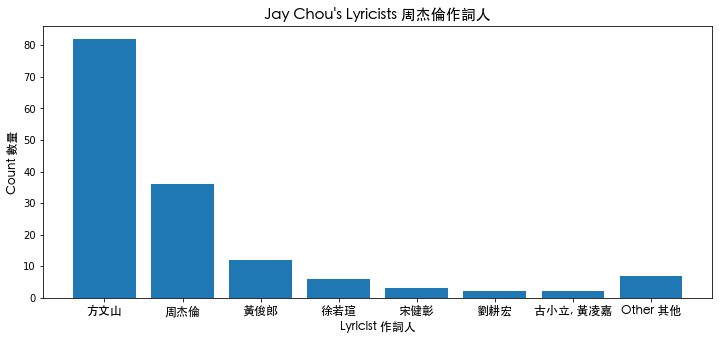

In [19]:
#plot of Jay Chou's most frequently collaborated lyricists
fig, ax = plt.subplots(figsize = (12, 5))
ax.bar(lyricist_count_df['lyricist'], lyricist_count_df['name'])
ax.set_xlabel('Lyricist 作詞人', fontproperties = 'Heiti TC', size = 12)
ax.set_ylabel('Count 數量', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Lyricists 周杰倫作詞人", fontproperties = 'Heiti TC', size = 15)
ax.set_xticklabels(lyricist_count_df['lyricist'], fontproperties = 'Heiti TC', size = 12)
plt.show()

In [20]:
#get album data for songs that have lyrics written by 方文山
vincent_album_df = df[df['lyricist'] == '方文山'].groupby(['album', 'year'], as_index = False).mean().sort_values('year').set_index('album').drop(columns = ['track_number', 'key', 'time_signature'])


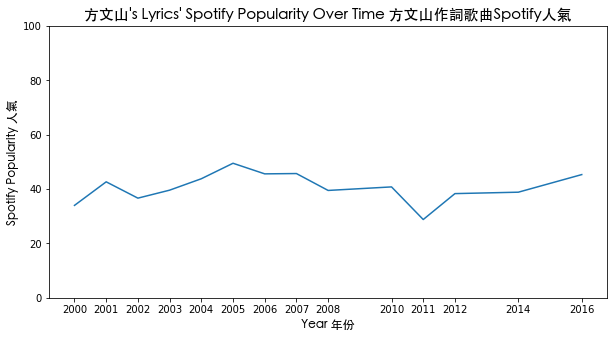

In [21]:
#方文山 lyrics' Spotify popularity over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(vincent_album_df['year'], vincent_album_df['popularity'])
ax.set_xlabel('Year 年份', fontproperties = 'Heiti TC', size = 12)
ax.set_ylim(bottom = 0, top = 100)
ax.set_ylabel('Spotify Popularity 人氣', fontproperties = 'Heiti TC', size = 12)
ax.set_title("方文山's Lyrics' Spotify Popularity Over Time 方文山作詞歌曲Spotify人氣", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(albums_df['year'])
plt.show()

In [22]:
#get album data for songs that have lyrics written by Jay Chou
jay_lyrics_album_df = df[df['lyricist'] == '周杰倫'].groupby(['album', 'year'], as_index = False).mean().sort_values('year').set_index('album').drop(columns = ['track_number', 'key', 'time_signature'])


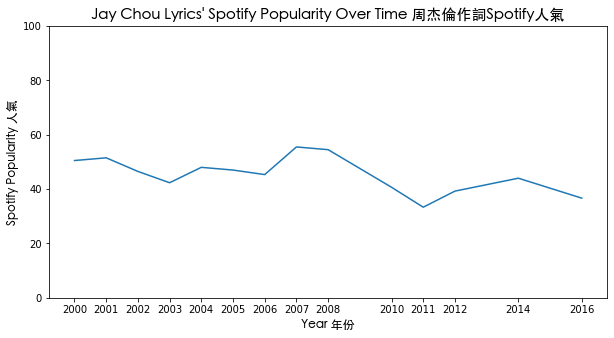

In [23]:
#Jay Chou lyrics' Spotify popularity over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(jay_lyrics_album_df['year'], jay_lyrics_album_df['popularity'])
ax.set_xlabel('Year 年份', fontproperties = 'Heiti TC', size = 12)
ax.set_ylim(bottom = 0, top = 100)
ax.set_ylabel('Spotify Popularity 人氣', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou Lyrics' Spotify Popularity Over Time 周杰倫作詞Spotify人氣", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(albums_df['year'])
plt.show()

Lyrics written by Jay Chou himself seem to be getting less popular while lyrics written by 方文山 are staying quite constant in terms of popularity.

#### 3.2 Collaborating Arranger

In [24]:
#Jay Chou's most frequently collaborated arrangers
arranger_count_df = df.groupby('arranger', as_index = False).count()[['arranger', 'name']].sort_values(by = 'name', ascending = False).reset_index(drop = True)
arranger_count_df

,arranger,name
0,林邁可,43
1,黃雨勳,34
2,鍾興民,29
3,洪敬堯,20
4,周杰倫,17
5,蔡科俊,6
6,蔡庭貴,1


<ipython-input-25-fb51659b0c44>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(arranger_count_df['arranger'], fontproperties = 'Heiti TC', size = 12)


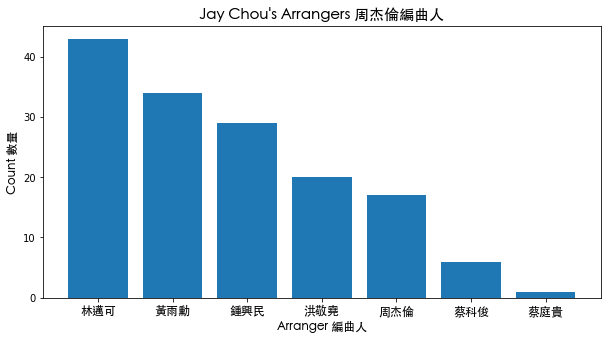

In [25]:
#plot of Jay Chou's most frequently collaborated arrangers
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(arranger_count_df['arranger'], arranger_count_df['name'])
ax.set_xlabel('Arranger 編曲人', fontproperties = 'Heiti TC', size = 12)
ax.set_ylabel('Count 數量', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Arrangers 周杰倫編曲人", fontproperties = 'Heiti TC', size = 15)
ax.set_xticklabels(arranger_count_df['arranger'], fontproperties = 'Heiti TC', size = 12)
plt.show()

In [26]:
#get album data for songs that have arrangements by Jay Chou
jay_arrangement_album_df = df[df['arranger'] == '周杰倫'].groupby(['album', 'year'], as_index = False).mean().sort_values('year').set_index('album').drop(columns = ['track_number', 'key', 'time_signature'])


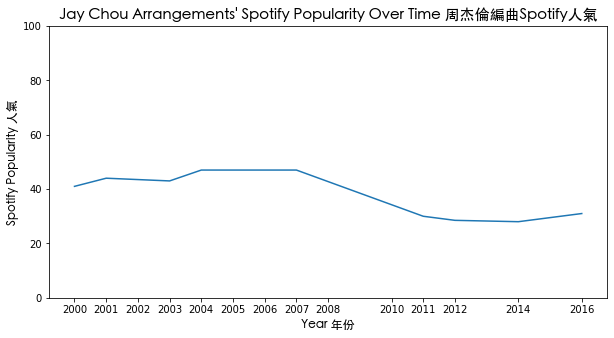

In [27]:
#Jay Chou arrangements' Spotify popularity over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(jay_arrangement_album_df['year'], jay_arrangement_album_df['popularity'])
ax.set_xlabel('Year 年份', fontproperties = 'Heiti TC', size = 12)
ax.set_ylim(bottom = 0, top = 100)
ax.set_ylabel('Spotify Popularity 人氣', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou Arrangements' Spotify Popularity Over Time 周杰倫編曲Spotify人氣", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(albums_df['year'])
plt.show()

Jay Chou's arrangement quality seems to have a decrease in popularity since 2007.

#### 3.3 Spotify Popularity

Spotify popularity is how popular the song is on Spotify out of 100.

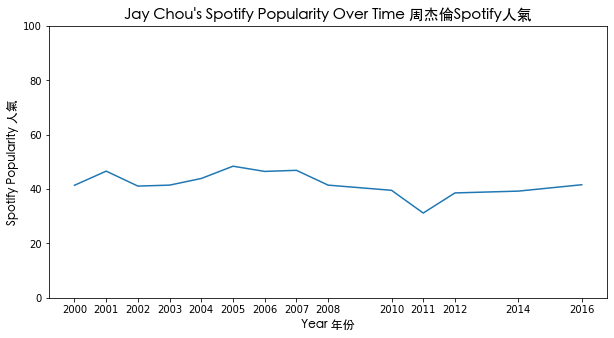

In [28]:
#Jay Chou's Spotify popularity over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(albums_df['year'], albums_df['popularity'])
ax.set_xlabel('Year 年份', fontproperties = 'Heiti TC', size = 12)
ax.set_ylim(bottom = 0, top = 100)
ax.set_ylabel('Spotify Popularity 人氣', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Spotify Popularity Over Time 周杰倫Spotify人氣", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(albums_df['year'])
plt.show()

All of Jay Chou's albums throughout the 20 years have around the same Spotify-popularity. The most popular album is 2005's 十一月的蕭邦 (November's Chopin) and the least popular album is 2011's 驚嘆號 (Exclamation Mark).

In [29]:
#Jay Chou's 5 most Spotify-popular songs from his studio albums
most_popular = df.sort_values('popularity', ascending = False).reset_index(drop = True).head(5)
most_popular

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,告白氣球,2016,周杰倫的床邊故事,方文山,林邁可,8,63,0.590,0.572,11,-7.658,1,0.0379,0.1920,0.000000,0.448,179.989,215,4,BM
1,晴天,2003,葉惠美,周杰倫,周杰倫,3,61,0.547,0.567,7,-7.295,1,0.0242,0.2760,0.000548,0.399,137.130,269,4,GM
2,安靜,2001,范特西,周杰倫,鍾興民,10,59,0.507,0.402,10,-7.869,1,0.0279,0.6130,0.000009,0.124,143.860,334,4,BbM
3,一路向北,2005,11月的蕭邦,方文山,蔡科俊,12,58,0.456,0.617,5,-6.252,1,0.0273,0.0133,0.000060,0.300,133.917,294,4,FM
4,珊瑚海,2005,11月的蕭邦,方文山,鍾興民,10,58,0.459,0.565,8,-5.537,1,0.0274,0.7730,0.000000,0.149,145.988,254,4,AbM


In [30]:
#Jay Chou's 5 least Spotify-popular songs from his studio albums
least_popular = df.sort_values('popularity').reset_index(drop = True).head(5)
least_popular

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,皮影戲,2011,驚嘆號,從從,林邁可,10,26,0.627,0.778,11,-7.550,0,0.0281,0.12700,0.3390,0.541,110.034,209,4,Bm
1,驚嘆號,2011,驚嘆號,方文山,林邁可,1,26,0.571,0.944,0,-3.511,0,0.0962,0.00182,0.0143,0.350,117.982,231,4,Cm
2,比較大的大提琴,2012,十二新作,方文山,黃雨勳,6,27,0.750,0.634,10,-8.402,0,0.0506,0.14100,0.0000,0.904,132.042,252,4,Bbm
3,四季列車,2012,十二新作,方文山,周杰倫,1,27,0.539,0.914,2,-5.522,1,0.0381,0.00194,0.5490,0.432,99.993,159,4,DM
4,陽明山,2014,哎呦 不錯哦,方文山,林邁可,1,27,0.714,0.860,2,-6.024,1,0.0481,0.01950,0.0000,0.917,112.000,152,4,DM


Jay Chou's 5 least Spotify-popular songs were all written between 2010 and 2012 and mostly with lyrics by 方文山 and arranged by 林邁可.

#### 3.4 Duration

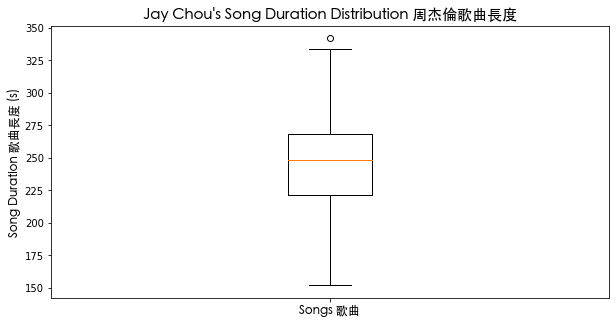

In [31]:
#Jay Chou's song duration distribution
fig, ax = plt.subplots(figsize = (10, 5))
ax.boxplot(df['duration_s'])
ax.set_xticklabels(['Songs 歌曲'], fontproperties = 'Heiti TC', size = 12)
ax.set_ylabel('Song Duration 歌曲長度 (s)', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Song Duration Distribution 周杰倫歌曲長度", fontproperties = 'Heiti TC', size = 15)
plt.show()

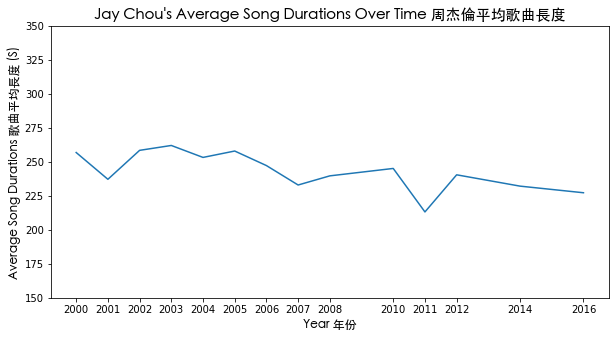

In [32]:
#Jay Chou's average song durations over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(albums_df['year'], albums_df['duration_s'])
ax.set_xlabel('Year 年份', fontproperties = 'Heiti TC', size = 12)
ax.set_ylim(bottom = 150, top = 350)
ax.set_ylabel('Average Song Durations 歌曲平均長度 (S)', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Average Song Durations Over Time 周杰倫平均歌曲長度", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(albums_df['year'])
plt.show()

All of Jay Chou's albums throughout the 20 years have around the same average song durations, although they are slightly shortening over time. 2011's album 驚嘆號 (Exclamation Mark) is exceptionally short.

In [33]:
#the 5 longest songs from Jay Chou's studio albums
df.sort_values('duration_s', ascending = False).reset_index(drop = True).head(5)

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,以父之名,2003,葉惠美,黃俊郎,洪敬堯,1,47,0.432,0.564,2,-7.369,0,0.0407,0.2980,0.233000,0.398,174.960,342,4,Dm
1,安靜,2001,范特西,周杰倫,鍾興民,10,59,0.507,0.402,10,-7.869,1,0.0279,0.6130,0.000009,0.124,143.860,334,4,BbM
2,半島鐵盒,2002,八度空間,周杰倫,林邁可,2,49,0.784,0.439,8,-7.872,1,0.0357,0.4320,0.000005,0.491,129.981,317,4,AbM
3,東風破,2003,葉惠美,方文山,林邁可,5,48,0.700,0.410,7,-8.164,1,0.0274,0.0988,0.130000,0.361,146.003,315,4,GM
4,時光機,2008,魔杰座,方文山,黃雨勳,9,43,0.450,0.626,0,-7.435,1,0.0364,0.5840,0.000000,0.411,205.927,309,4,CM


In [34]:
#the 5 shortest songs from Jay Chou's studio albums
df.sort_values('duration_s').reset_index(drop = True).head(5)

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,陽明山,2014,哎呦 不錯哦,方文山,林邁可,1,27,0.714,0.860,2,-6.024,1,0.0481,0.01950,0.000000,0.917,112.000,152,4,DM
1,超跑女神,2011,驚嘆號,方文山,林邁可,11,31,0.730,0.603,9,-9.281,1,0.0367,0.10200,0.000687,0.661,140.050,156,4,AM
2,一口氣全唸對,2014,哎呦 不錯哦,方文山,周杰倫,6,28,0.697,0.842,1,-7.114,1,0.0440,0.00469,0.175000,0.613,110.045,158,4,C#M/DbM
3,忍者,2001,范特西,方文山,林邁可,4,38,0.829,0.845,9,-4.049,1,0.0486,0.25100,0.000000,0.211,106.041,158,4,AM
4,四季列車,2012,十二新作,方文山,周杰倫,1,27,0.539,0.914,2,-5.522,1,0.0381,0.00194,0.549000,0.432,99.993,159,4,DM


All of Jay Chou's shortest songs have lyrics written by 方文山.

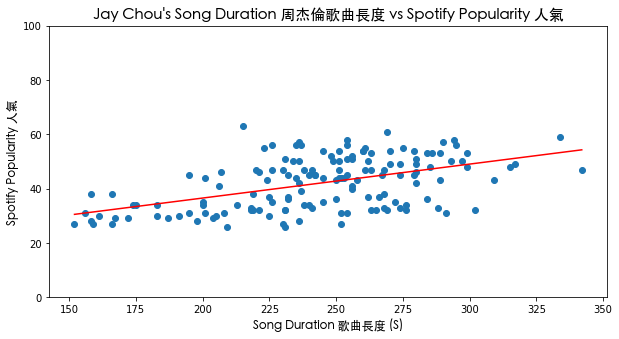

In [35]:
#Jay Chou's song duration vs Spotify popularity
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(df['duration_s'], df['popularity'])
ax.set_ylim(bottom = 0, top = 100)
ax.set_xlabel('Song Duration 歌曲長度 (S)', fontproperties = 'Heiti TC', size = 12)
ax.set_ylabel('Spotify Popularity 人氣', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Song Duration 周杰倫歌曲長度 vs Spotify Popularity 人氣", fontproperties = 'Heiti TC', size = 15)
ax.plot(np.unique(df['duration_s']), np.poly1d(np.polyfit(df['duration_s'], df['popularity'], 1))(np.unique(df['duration_s'])), color = 'red')
plt.show()

The longer a Jay Chou song is, the more likely it will be popular on Spotify.

#### 3.5 Spotify Audio Features

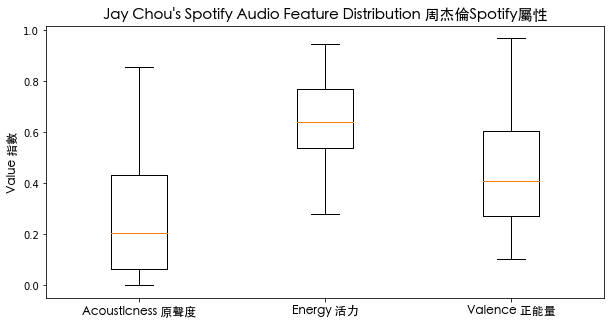

In [36]:
#Jay Chou's Spotify audio feature distribution
fig, ax = plt.subplots(figsize = (10, 5))
ax.boxplot([df['acousticness'], df['energy'], df['valence']])
ax.set_xticklabels(['Acousticness 原聲度', 'Energy 活力', 'Valence 正能量'], fontproperties = 'Heiti TC', size = 12)
ax.set_ylabel('Value 指數', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Spotify Audio Feature Distribution 周杰倫Spotify屬性", fontproperties = 'Heiti TC', size = 15)
plt.show()

Spotify Audio Features are features generated by Spotify. I find them subjective though.

##### 3.5.1 Acousticness

Acousticness is how naturally-produced the sound is (not produced through electronic ways).

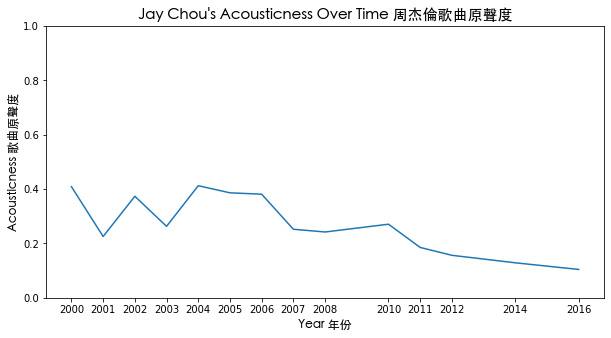

In [37]:
#Jay Chou's acousticness over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(albums_df['year'], albums_df['acousticness'])
ax.set_xlabel('Year 年份', fontproperties = 'Heiti TC', size = 12)
ax.set_ylim(bottom = 0, top = 1)
ax.set_ylabel('Acousticness 歌曲原聲度', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Acousticness Over Time 周杰倫歌曲原聲度", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(albums_df['year'])
plt.show()

Jay Chou's most acoustic album is 2004's 七里香 (Common Jasmin Orange). Jay Chou has a notable constant drop of acousticness starting from 2011's 驚嘆號 (Exclamation Mark) where his style changed to be more electrical.

##### 3.5.2 Energy

Energy is how energetic the song is.

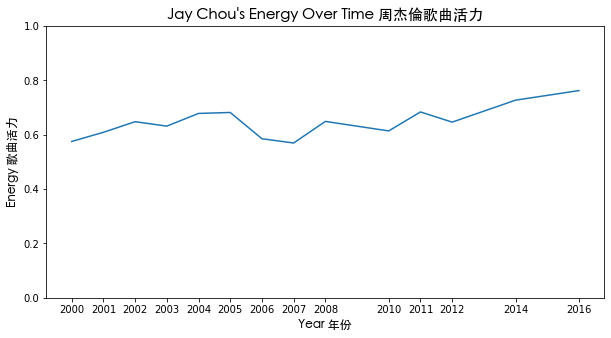

In [38]:
#Jay Chou's energy over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(albums_df['year'], albums_df['energy'])
ax.set_xlabel('Year 年份', fontproperties = 'Heiti TC', size = 12)
ax.set_ylim(bottom = 0, top = 1)
ax.set_ylabel('Energy 歌曲活力', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Energy Over Time 周杰倫歌曲活力", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(albums_df['year'])
plt.show()

For the past 20 years, Jay Chou's energy in songs has been pretty consistent. However, there has been a slight increase. The most recent albums 哎呦 不錯哦 (Aiyo, Not Bad) and 周杰倫的床邊故事 (Jay Chou's Bedtime Stories) are his most energetic albums so far.

In [39]:
#the 5 most energetic songs from Jay Chou's studio albums
df.sort_values('energy', ascending = False).reset_index(drop = True).head(5)

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,驚嘆號,2011,驚嘆號,方文山,林邁可,1,26,0.571,0.944,0,-3.511,0,0.0962,0.001820,0.01430,0.350,117.982,231,4,Cm
1,藍色風暴,2005,11月的蕭邦,方文山,洪敬堯,2,36,0.333,0.940,2,-4.026,1,0.0694,0.110000,0.00157,0.562,98.002,284,4,DM
2,英雄,2016,周杰倫的床邊故事,周杰倫,黃雨勳,5,31,0.549,0.939,7,-5.968,1,0.0460,0.000106,0.01210,0.428,118.988,201,4,GM
3,水手怕水,2011,驚嘆號,黃俊郎,周杰倫,8,30,0.718,0.924,6,-5.690,0,0.0399,0.132000,0.61900,0.920,139.971,161,4,F#m/Gbm
4,土耳其冰淇淋,2016,周杰倫的床邊故事,周杰倫,周杰倫,7,31,0.662,0.924,7,-6.473,1,0.0417,0.002030,0.20600,0.602,114.015,195,4,GM


In [40]:
#the 5 least energetic songs from Jay Chou's studio albums
df.sort_values('energy').reset_index(drop = True).head(5)

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,彩虹,2007,我很忙,周杰倫,林邁可,2,55,0.612,0.279,0,-10.306,1,0.0386,0.778,0.000000,0.345,147.916,261,4,CM
1,你好嗎,2011,驚嘆號,"羅宇軒, 李汪哲",黃雨勳,5,43,0.281,0.284,8,-11.452,1,0.0314,0.854,0.000000,0.240,147.157,224,4,AbM
2,黑色幽默,2000,杰倫,周杰倫,鍾興民,6,49,0.603,0.292,10,-7.622,1,0.0282,0.406,0.000000,0.231,127.905,280,4,BbM
3,星晴,2000,杰倫,周杰倫,洪敬堯,3,52,0.637,0.329,7,-10.366,1,0.0349,0.725,0.000009,0.255,177.792,256,4,GM
4,菊花台,2006,依然范特西,方文山,鍾興民,10,50,0.406,0.354,5,-6.814,1,0.0277,0.569,0.000000,0.222,137.746,293,4,FM


His most energetic songs are mostly new songs and his least energetic songs are mostly old songs.

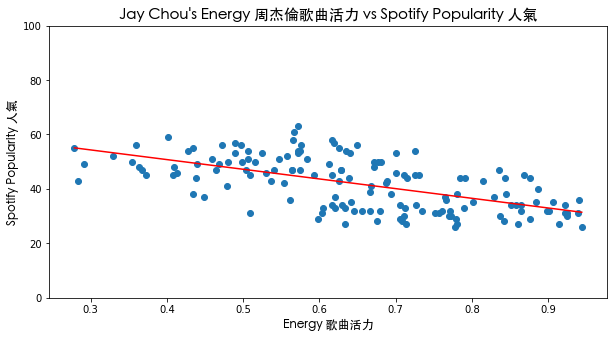

In [41]:
#Jay Chou's energy vs Spotify popularity
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(df['energy'], df['popularity'])
ax.set_ylim(bottom = 0, top = 100)
ax.set_xlabel('Energy 歌曲活力', fontproperties = 'Heiti TC', size = 12)
ax.set_ylabel('Spotify Popularity 人氣', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Energy 周杰倫歌曲活力 vs Spotify Popularity 人氣", fontproperties = 'Heiti TC', size = 15)
ax.plot(np.unique(df['energy']), np.poly1d(np.polyfit(df['energy'], df['popularity'], 1))(np.unique(df['energy'])), color = 'red')
plt.show()

Looking at all of Jay Chou's studio album songs, we can see that the less energetic a song is, the more likely it will be popular on Spotify.

##### 3.5.3 Valence

Valence is how positive the song sounds.

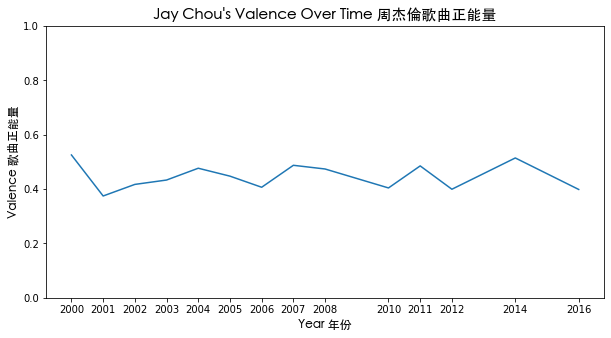

In [42]:
#Jay Chou's valence over time
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(albums_df['year'], albums_df['valence'])
ax.set_xlabel('Year 年份', fontproperties = 'Heiti TC', size = 12)
ax.set_ylim(bottom = 0, top = 1)
ax.set_ylabel('Valence 歌曲正能量', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Valence Over Time 周杰倫歌曲正能量", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(albums_df['year'])
plt.show()

Jay Chou's valence is pretty constant throughout his career. 

In [43]:
#the 5 most valent songs from Jay Chou's studio albums
df.sort_values('valence', ascending = False).reset_index(drop = True).head(5)

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,公公偏頭痛,2012,十二新作,方文山,周杰倫,3,30,0.468,0.770,5,-10.070,0,0.0631,0.0541,0.396000,0.969,127.941,183,4,Fm
1,竊愛,2014,哎呦 不錯哦,黃俊郎,黃雨勳,2,29,0.651,0.876,0,-6.233,0,0.0327,0.0137,0.004410,0.959,126.003,204,4,Cm
2,魔術先生,2008,魔杰座,方文山,鍾興民,5,30,0.730,0.711,0,-6.318,1,0.0802,0.4460,0.000000,0.929,128.042,225,4,CM
3,可愛女人,2000,杰倫,徐若瑄,周杰倫,1,50,0.767,0.671,5,-9.995,1,0.0317,0.5520,0.000032,0.921,135.468,236,4,FM
4,水手怕水,2011,驚嘆號,黃俊郎,周杰倫,8,30,0.718,0.924,6,-5.690,0,0.0399,0.1320,0.619000,0.920,139.971,161,4,F#m/Gbm


In [44]:
#the 5 least valent songs from Jay Chou's studio albums
df.sort_values('valence').reset_index(drop = True).head(5)

,name,year,album,lyricist,arranger,track_number,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_s,time_signature,Mmkey
0,心雨,2006,依然范特西,方文山,林邁可,7,45,0.572,0.509,0,-7.281,1,0.0351,0.609,0.000000,0.104,124.006,267,4,CM
1,夢想啟動,2012,十二新作,林義傑,林邁可,9,30,0.558,0.773,3,-10.795,1,0.0636,0.131,0.027000,0.113,180.030,205,4,EbM
2,安靜,2001,范特西,周杰倫,鍾興民,10,59,0.507,0.402,10,-7.869,1,0.0279,0.613,0.000009,0.124,143.860,334,4,BbM
3,擱淺,2004,七里香,宋健彰,鍾興民,6,57,0.497,0.490,5,-7.161,1,0.0276,0.671,0.000417,0.126,122.710,236,4,FM
4,分裂,2002,八度空間,周杰倫,鍾興民,6,44,0.637,0.438,1,-8.504,1,0.0282,0.515,0.000007,0.145,122.699,252,4,C#M/DbM


夢想啟動 (Dream) being among the least valent songs is very surprising because the song is about self-motivation and following one's dreams.

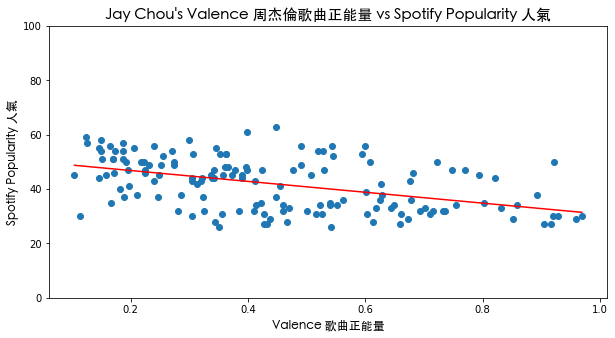

In [45]:
#Jay Chou's valence vs Spotify popularity
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(df['valence'], df['popularity'])
ax.set_ylim(bottom = 0, top = 100)
ax.set_xlabel('Valence 歌曲正能量', fontproperties = 'Heiti TC', size = 12)
ax.set_ylabel('Spotify Popularity 人氣', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Valence 周杰倫歌曲正能量 vs Spotify Popularity 人氣", fontproperties = 'Heiti TC', size = 15)
ax.plot(np.unique(df['valence']), np.poly1d(np.polyfit(df['valence'], df['popularity'], 1))(np.unique(df['valence'])), color = 'red')
plt.show()

The less valennt a Jay Chou song is, the more likely that it will be popular on Spotify.

#### 3.6 Jay Chou's Major/minor Key Usage

In [46]:
#get the count of each Major/minor key Jay Chou used
keys = ['CM', 'Cm', 'C#M/DbM', 'C#m/Dbm', 'DM', 'Dm', 'EbM', 'Ebm',
       'EM', 'Em', 'FM', 'Fm', 'F#M/GbM', 'F#m/Gbm', 'GM', 'Gm', 'AbM', 'Abm',
       'AM', 'Am', 'BbM', 'Bbm', 'BM', 'Bm']
keys_groupby = df.groupby('Mmkey').count()
keys_df = pd.DataFrame(index = keys)
key_count = keys_df.join(keys_groupby)['name'].rename('count').fillna(0)

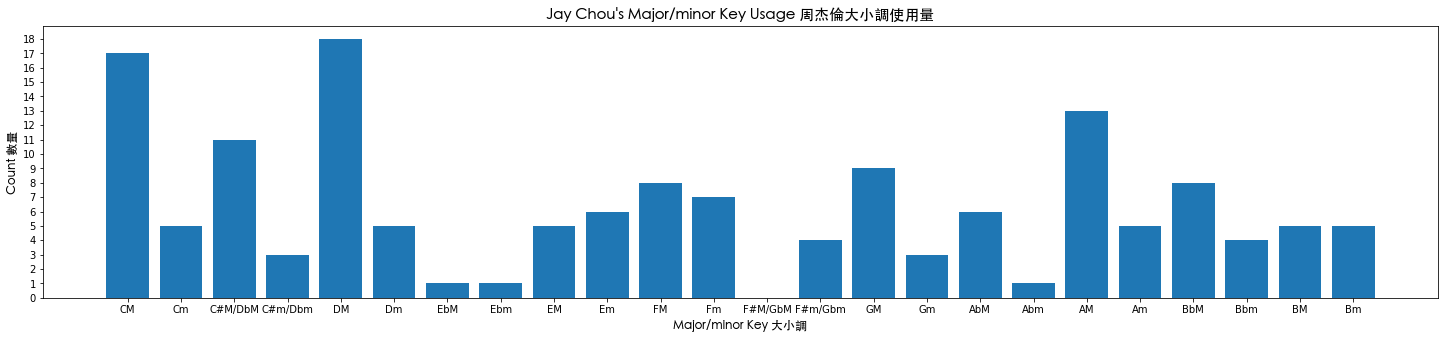

In [47]:
#Jay Chou's Major/minor key usage in all studio albums
fig, ax = plt.subplots(figsize = (25, 5))
ax.bar(key_count.index, key_count.values)
ax.set_xlabel('Major/minor Key 大小調', fontproperties = 'Heiti TC', size = 12)
ax.set_ylabel('Count 數量', fontproperties = 'Heiti TC', size = 12)
ax.set_title("Jay Chou's Major/minor Key Usage 周杰倫大小調使用量", fontproperties = 'Heiti TC', size = 15)
ax.set_xticks(key_count.index)
ax.set_yticks(range(0, 19))
plt.show()

Jay Chou's most used keys are C and D major. Jay Chou haven't used F#M/GbM in his studio albums as of 2016.

### 4. Final Words

Some key takeaways are that:

- Jay Chou's most-frequent collaborating lyricist is 方文山 and most-frequent collaborating arranger is 林邁可.

- The longer a Jay Chou song is, the more likely that it will be popular on Spotify.

- Jay Chou's most used keys are C and D major. Jay Chou hasn't used F#M/GbM in his studio albums yet as of 2016.

Summaries of this Notebook is presented at: https://brc042.github.io/Data-Analysis-on-Jay-Chou/

Finally, I will like to thank the Spotify API for having these data for me to analyze. I hope you enjoyed this data analysis on Jay Chou.

-Brian Cheng 2020